In [2]:
import pandas as pd
import numpy as np

In [3]:
path="D:/my own/automobile.csv"

In [4]:
df=pd.read_csv(path)

There are several ways to normalize data.
some important 3 techniques are

 **simple feature scaling** 

 $$X_{new} = \frac{X_{old}}{X_{max}}$$

This makes the new values range between 0 and 1.


**Min-Max**

$$X_{new} = \frac{X_{old} - X_{min}}{X_{max} - X_{min}}$$


the resulting new values range between 0 and 1.

**z-score or standard score**

$$X_{new} = \frac{X_{old} - \mu}{\sigma}$$

where ,
$$\mu(mean) = \frac{\sum x_i}{N}$$ 
$$\sigma(Standard
 deviation) = \sqrt{\frac{\sum (x_i - \mu)^2}{N}}$$
The resulting values hover around 0, and typically range between -3 and +3, but can be higher
or lower.

**__Simple Feature Scaling__**

In [5]:
df.iloc[:10,25]

0    13495
1    16500
2    16500
3    13950
4    17450
5    15250
6    17710
7    18920
8    23875
9    16430
Name: price, dtype: int64

In [6]:
df["price"]=df["price"]/df["price"].max()

In [7]:
df.iloc[:10,25]

0    0.297247
1    0.363436
2    0.363436
3    0.307269
4    0.384361
5    0.335903
6    0.390088
7    0.416740
8    0.525881
9    0.361894
Name: price, dtype: float64

**Min_Max Feature**

In [8]:
df.iloc[:10,24]

0    27
1    27
2    26
3    30
4    22
5    25
6    25
7    25
8    20
9    29
Name: highway-mpg, dtype: int64

In [9]:
df["highway-mpg"]=(df["highway-mpg"]-df["highway-mpg"].min()) / (df["highway-mpg"].max()-df["highway-mpg"].min())

In [10]:
df.iloc[:10,24]

0    0.289474
1    0.289474
2    0.263158
3    0.368421
4    0.157895
5    0.236842
6    0.236842
7    0.236842
8    0.105263
9    0.342105
Name: highway-mpg, dtype: float64

**Z-Score Method**

In [11]:
df.iloc[:10,10]

0    168.8
1    168.8
2    171.2
3    176.6
4    176.6
5    177.3
6    192.7
7    192.7
8    192.7
9    176.8
Name: length, dtype: float64

In [12]:
df["length"]=(df["length"] - df["length"].mean() ) / df["length"].std()

In [13]:
df.iloc[:10,10]

0   -0.438315
1   -0.438315
2   -0.243544
3    0.194690
4    0.194690
5    0.251498
6    1.501278
7    1.501278
8    1.501278
9    0.210921
Name: length, dtype: float64

**Binning**

Binning is when you group values together into bins. For example, you can bin “age”
into [0 to 5], [6 to 10], [11 to 15] and so on.
Sometimes, binning can improve accuracy of the predictive models

In Python we can easily implement the binning: We would like 3 bins of equal binwidth, so
we need 4 numbers as dividers that are equal distance apart.
First we use the numpy function “linspace” to return the array “bins” that contains
4 equally spaced numbers over the specified interval of the price.
We create a list “group_names “ that contains the different bin names.
We use the pandas function ”cut” to segment and sort the data values into bins.

In [14]:
ndf=pd.read_csv(path)

In [16]:
# Step 1

bins = np.linspace(min(df["price"]),max(df["price"]),4)

In [17]:
# Step 2

group_names=["Low","Medium","High"]

In [18]:
df["price-binned"]=pd.cut(df["price"], bins , labels=group_names, include_lowest=True)

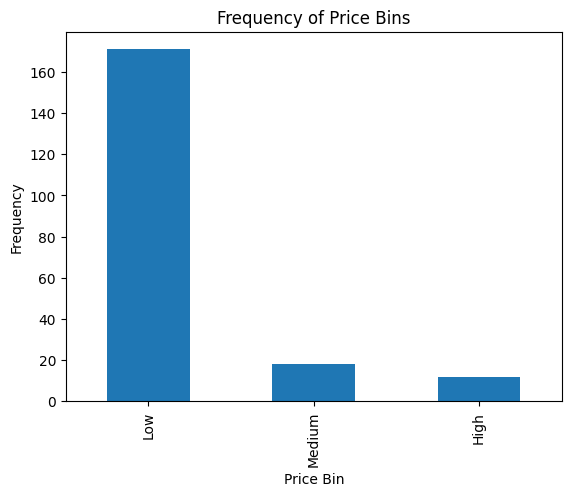

In [20]:
import matplotlib.pyplot as plt

bin_counts = df["price-binned"].value_counts()
bin_counts.plot(kind="bar")
plt.title("Frequency of Price Bins")
plt.xlabel("Price Bin")
plt.ylabel("Frequency")
plt.show()

From the plot, it is clear that most cars have a low price, and only very few cars have
high price.